# Graph Learning

## Lab 7: Graph Neural Networks

In this lab, you will learn to classify nodes using a graph neural network (GNN).

## Import

In [132]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [3]:
pip install scikit-network

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 70.0 MB/s eta 0:00:00


In [133]:
from sknetwork.classification import get_accuracy_score
from sknetwork.data import load_netset
from sknetwork.embedding import Spectral
from sknetwork.gnn import GNNClassifier
from sknetwork.utils import directed2undirected

from sklearn.manifold import TSNE

## Data

We will work on the following datasets (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Cora (directed graph + bipartite graph)
* WikiVitals (directed graph + bipartite graph)

Both datasets are graphs with node features (given by the bipartite graph) and ground-truth labels.

In [134]:
cora = load_netset('cora')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


In [135]:
def visualize_embedding(embedding, labels, size=(6,6)):
    """Visualize embedding in 2 dimensions using TSNE. """
    print("Computing TSNE...")
    tsne = TSNE(random_state=8).fit_transform(embedding)
    fig, ax = plt.subplots(1, 1, figsize=size)
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, s=50, cmap='hsv')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## 1. Cora

We start with the Cora dataset. We check the embedding of the nodes before and after learning, and the impact of the GNN architecture on accuracy.

In [136]:
dataset = cora

In [137]:
adjacency = dataset.adjacency
features = dataset.biadjacency
labels_true = dataset.labels

In [138]:
# we use undirected graphs
adjacency = directed2undirected(adjacency)

## To do

Consider a GNN with a single hidden layer of dimension 16.

* Run a single forward pass on the data, without learning.
* Display the embedding provided by the hidden layer.

In [139]:
hidden_dim = 16

In [140]:
n_labels = len(set(labels_true))

In [141]:
gnn = GNNClassifier(dims=[hidden_dim, n_labels], verbose=True)

In [142]:
gnn

GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [143]:
output = gnn.forward(adjacency, features)

In [144]:
# hidden layer
embedding = gnn.layers[0].embedding

Computing TSNE...


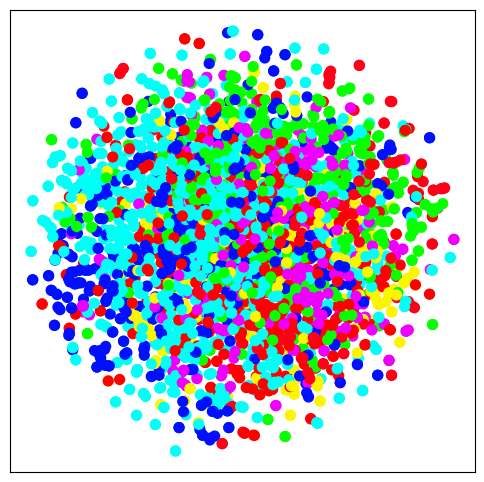

In [145]:
visualize_embedding(embedding, labels_true)

## To do

We now train the GNN.

* Train the GNN with 50% / 50% train / test split.
* Give the accuracy of the classification on the train and test sets.
* Give the total number of parameters.
* Display the embedding provided by the hidden layer.

In [146]:
# train / test split
ratio_train = 0.5
labels = labels_true.copy()
mask_train = np.random.random(size=len(labels)) < ratio_train
mask_test = ~mask_train
labels[mask_test] = -1

In [147]:
gnn.fit(adjacency, features, labels)

In epoch   0, loss: 2.030, train accuracy: 0.112
In epoch  10, loss: 1.707, train accuracy: 0.464
In epoch  20, loss: 1.493, train accuracy: 0.794
In epoch  30, loss: 1.375, train accuracy: 0.882
In epoch  40, loss: 1.294, train accuracy: 0.934
In epoch  50, loss: 1.249, train accuracy: 0.952
In epoch  60, loss: 1.225, train accuracy: 0.968
In epoch  70, loss: 1.209, train accuracy: 0.980
In epoch  80, loss: 1.199, train accuracy: 0.986
In epoch  90, loss: 1.191, train accuracy: 0.990


GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [148]:
labels_pred = gnn.predict()

In [149]:
 get_accuracy_score(labels_pred , labels_true)

np.float64(0.8947562776957164)

In [150]:
get_accuracy_score(labels_pred[mask_test] , labels_true[mask_test])

np.float64(0.8008689355539464)

In [151]:
 round(np.mean(labels_pred[mask_train] == labels_true[mask_train]), 2)

np.float64(0.99)

In [152]:
get_accuracy_score(labels_pred[mask_train],labels_true[mask_train])

np.float64(0.9924642049736248)

In [153]:
gnn.get_params()

{'loss': <sknetwork.gnn.loss.CrossEntropy at 0x7a801da7cad0>,
 'layers': [  Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True),
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)],
 'optimizer': <sknetwork.gnn.optimizer.ADAM at 0x7a801da7f3d0>,
 'early_stopping': True,
 'patience': 10}

In [154]:
n_in = features.shape[1]
total_params = (n_in * 16 + 16) + (16 * 7 + 7)
print(total_params)

23063


Computing TSNE...


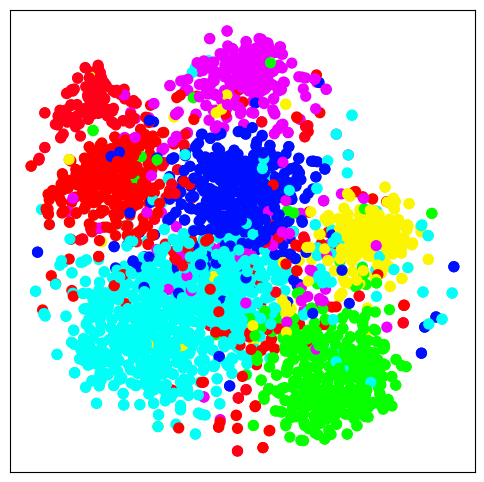

In [155]:
embedding = gnn.layers[0].embedding
visualize_embedding(embedding, labels_true)

## To do

* Retrain the GNN with an empty graph.
* Compare the accuracy of the classification with that of the previous model.
* Comment the results. <br>What is the learning model?

In [156]:
empty = sparse.csr_matrix(adjacency.shape)

In [157]:
gnn_empty = GNNClassifier(dims=[hidden_dim, n_labels], verbose=True)
labels_empty = labels_true.copy()
labels_empty[mask_test] = -1
gnn_empty.fit(empty, features, labels_empty)
labels_pred_empty = gnn_empty.predict()

print('Accuracy with empty graph (test set):', round(np.mean(labels_pred_empty[mask_test] == labels_true[mask_test]), 3))

In epoch   0, loss: 1.929, train accuracy: 0.203
In epoch  10, loss: 1.717, train accuracy: 0.546
In epoch  20, loss: 1.503, train accuracy: 0.815
In epoch  30, loss: 1.332, train accuracy: 0.932
In epoch  40, loss: 1.241, train accuracy: 0.980
In epoch  50, loss: 1.202, train accuracy: 0.995
In epoch  60, loss: 1.186, train accuracy: 0.997
In epoch  70, loss: 1.179, train accuracy: 0.998
In epoch  80, loss: 1.175, train accuracy: 1.000
In epoch  90, loss: 1.173, train accuracy: 1.000
Accuracy with empty graph (test set): 0.657


In [158]:
print('Accuracy with empty graph (test set):', get_accuracy_score(labels_pred_empty[mask_test] ,labels_true[mask_test]))

Accuracy with empty graph (test set): 0.6567704561911658


In [159]:
print('Accuracy with original graph (test set):', get_accuracy_score(labels_pred[mask_test] , labels_true[mask_test]))

Accuracy with original graph (test set): 0.8008689355539464


* with non empty graph the result was better

with empty graph it's a normal neural network that used to classify the embeddings, however with a non empty graph, we add the interconnection information between nodes so it will give better classification.

## To do

We now consider a hidden layer of dimension 32.

* Retrain the GNN (with the graph).
* Give the accuracy of the classification and the number of parameters.
* Comment the results.

In [175]:
hidden_dim_new = 32

In [176]:
gnn_32_trained = GNNClassifier(dims=[hidden_dim_new, n_labels], verbose=True)

gnn_32_trained.fit(adjacency, features, labels)

labels_pred_32_trained = gnn_32_trained.predict()

print('Accuracy with hidden_dim = 32 (with graph) (test set):', get_accuracy_score(labels_pred_32_trained[mask_test], labels_true[mask_test]))

In epoch   0, loss: 1.985, train accuracy: 0.152
In epoch  10, loss: 1.494, train accuracy: 0.757
In epoch  20, loss: 1.297, train accuracy: 0.929
In epoch  30, loss: 1.225, train accuracy: 0.970
In epoch  40, loss: 1.197, train accuracy: 0.983
In epoch  50, loss: 1.184, train accuracy: 0.990
In epoch  60, loss: 1.179, train accuracy: 0.994
In epoch  70, loss: 1.176, train accuracy: 0.996
In epoch  80, loss: 1.174, train accuracy: 0.996
In epoch  90, loss: 1.173, train accuracy: 0.998
Accuracy with hidden_dim = 32 (with graph) (test set): 0.8414192614047792


In [177]:
n_in = features.shape[1]
total_params_32 = (n_in * hidden_dim_new + hidden_dim_new) + (hidden_dim_new * n_labels + n_labels)
print('Total number of parameters with hidden_dim = 32:', total_params_32)

Total number of parameters with hidden_dim = 32: 46119


In [178]:
print('Accuracy with hidden_dim = 16 (with graph) (test set):', get_accuracy_score(labels_pred[mask_test], labels_true[mask_test]))
print('Accuracy with hidden_dim = 32 (with graph) (test set):', get_accuracy_score(labels_pred_32_trained[mask_test], labels_true[mask_test]))

Accuracy with hidden_dim = 16 (with graph) (test set): 0.8218682114409848
Accuracy with hidden_dim = 32 (with graph) (test set): 0.8414192614047792


Increasing the hidden dimension is not a big changement (16 or 32 is almost the same), so the accuracy hasn't chagened.

## To do

Finally , we take 2 hidden layers, each of dimension 16.

* Retrain the GNN.
* Give the accuracy of the classification and the number of parameters.
* Comment the results.

In [182]:
hidden_dim = 16
gnn_two_layers = GNNClassifier(dims=[hidden_dim, hidden_dim, n_labels], verbose=True)

labels = labels_true.copy()
labels[mask_test] = -1

gnn_two_layers.fit(adjacency, features, labels)

labels_pred_two_layers = gnn_two_layers.predict()

In epoch   0, loss: 2.034, train accuracy: 0.116
In epoch  10, loss: 1.857, train accuracy: 0.325
In epoch  20, loss: 1.772, train accuracy: 0.473
In epoch  30, loss: 1.637, train accuracy: 0.603
In epoch  40, loss: 1.502, train accuracy: 0.719
In epoch  50, loss: 1.416, train accuracy: 0.793
In epoch  60, loss: 1.367, train accuracy: 0.843
In epoch  70, loss: 1.330, train accuracy: 0.871
In epoch  80, loss: 1.304, train accuracy: 0.894
In epoch  90, loss: 1.287, train accuracy: 0.909


In [183]:
accuracy_two_layers = get_accuracy_score(labels_pred_two_layers[mask_test], labels_true[mask_test])
print('Accuracy with two hidden layers (each of dim 16) (test set):', accuracy_two_layers)

Accuracy with two hidden layers (each of dim 16) (test set): 0.782766111513396


In [184]:
n_in = features.shape[1]
total_params_two_layers = (n_in * hidden_dim + hidden_dim) + (hidden_dim * hidden_dim + hidden_dim) + (hidden_dim * n_labels + n_labels)
print('Total number of parameters with two hidden layers (each of dim 16):', total_params_two_layers)

Total number of parameters with two hidden layers (each of dim 16): 23335


Adding a second hidden layer increases model capacity but slightly reduces accuracy(0.77), possibly due to overfitting or suboptimal hyperparameters. More layers do not always improve performance and must be balanced with the data complexity.

## 2. Wikivitals

We now focus on Wikivitals. We take the spectral embedding of the article-word bipartite graph as features.

In [185]:
dataset = wikivitals

In [186]:
adjacency = dataset.adjacency
biadjacency = dataset.biadjacency
names = dataset.names
labels_true = dataset.labels
names_labels = dataset.names_labels

In [187]:
# we consider the graph as undirected
adjacency = directed2undirected(adjacency)

In [188]:
# we use the spectral embedding of the bipartite graph as features
spectral = Spectral(20)
features = spectral.fit_transform(biadjacency)

## To do

We consider a GNN with a single hidden layer of dimension 16.
* Train the GNN with 50% / 50% train / test split.
* Give the accuracy of the classification.
* Display the confusion matrix of the test set.
* Give for each label the 5 articles of the test set classified with the highest confidence.

In [189]:
n_labels = len(set(labels_true))

In [190]:
gnn = GNNClassifier(dims=[hidden_dim, n_labels], verbose=True)

In [191]:
ratio_train = 0.5
labels = labels_true.copy()
mask_train = np.random.random(size=len(labels)) < ratio_train
mask_test = ~mask_train
labels[mask_test] = -1

gnn.fit(adjacency, features, labels)

labels_pred = gnn.predict()
probabilities = gnn.predict_proba()

accuracy_test = get_accuracy_score(labels_pred[mask_test], labels_true[mask_test])
print('Accuracy on the test set:', accuracy_test)

In epoch   0, loss: 2.404, train accuracy: 0.088
In epoch  10, loss: 2.307, train accuracy: 0.380
In epoch  20, loss: 2.168, train accuracy: 0.539
In epoch  30, loss: 2.048, train accuracy: 0.658
In epoch  40, loss: 1.959, train accuracy: 0.710
In epoch  50, loss: 1.896, train accuracy: 0.762
In epoch  60, loss: 1.852, train accuracy: 0.789
In epoch  70, loss: 1.823, train accuracy: 0.804
In epoch  80, loss: 1.806, train accuracy: 0.811
In epoch  90, loss: 1.795, train accuracy: 0.818
Accuracy on the test set: 0.8161328588374852


In [199]:
get_accuracy_score(labels_pred[mask_train], labels_true[mask_train])

np.float64(0.8227336967494447)

In [196]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

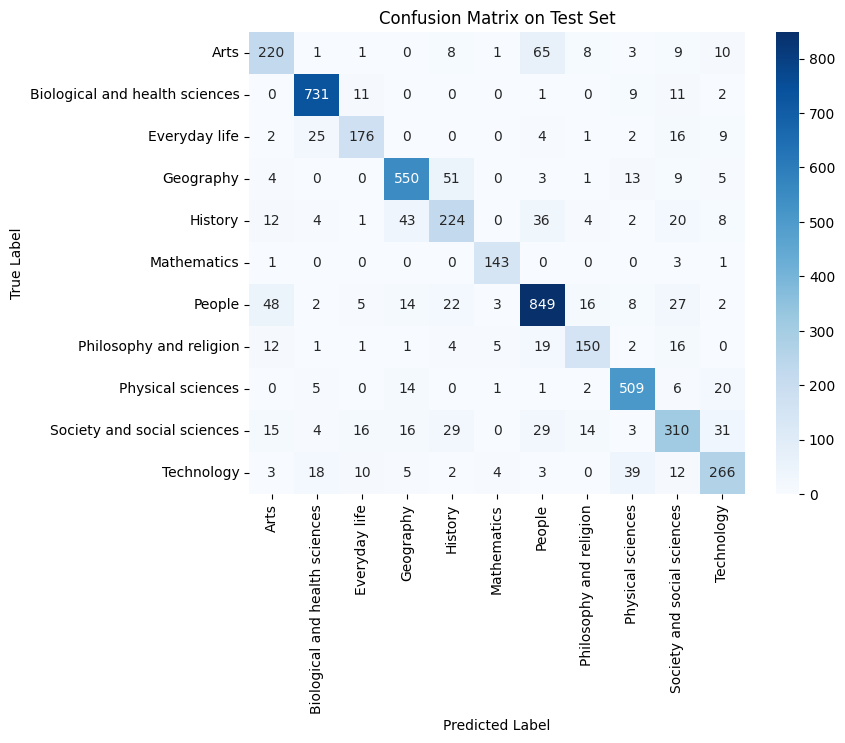

In [197]:
cm = confusion_matrix(labels_true[mask_test], labels_pred[mask_test])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=names_labels, yticklabels=names_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

In [203]:
test_indices = np.where(mask_test)[0]

for label_id in range(n_labels):
    print(f"\nTop 5 articles classified as '{names_labels[label_id]}' (confidence on test set):")
    probabilities_label = probabilities[test_indices, label_id]

    sorted_indices_in_test = np.argsort(probabilities_label)[::-1]

    sorted_original_indices = test_indices[sorted_indices_in_test]

    for i in range(min(5, len(sorted_original_indices))):
        article_index = sorted_original_indices[i]
        article_name = names[article_index]
        confidence = probabilities[article_index, label_id]
        true_label = names_labels[labels_true[article_index]]
        predicted_label = names_labels[labels_pred[article_index]]
        print(f"  - {article_name} (Confidence: {confidence:.4f}, True Label: {true_label}, Predicted Label: {predicted_label})")


Top 5 articles classified as 'Arts' (confidence on test set):
  - Metropolitan Museum of Art (Confidence: 0.9932, True Label: Arts, Predicted Label: Arts)
  - History of art (Confidence: 0.9909, True Label: History, Predicted Label: Arts)
  - Outsider art (Confidence: 0.9847, True Label: Arts, Predicted Label: Arts)
  - Collage (Confidence: 0.9837, True Label: Arts, Predicted Label: Arts)
  - Theatre (Confidence: 0.9831, True Label: Arts, Predicted Label: Arts)

Top 5 articles classified as 'Biological and health sciences' (confidence on test set):
  - Taxonomy (biology) (Confidence: 1.0000, True Label: Biological and health sciences, Predicted Label: Biological and health sciences)
  - Chordate (Confidence: 1.0000, True Label: Biological and health sciences, Predicted Label: Biological and health sciences)
  - Flowering plant (Confidence: 1.0000, True Label: Biological and health sciences, Predicted Label: Biological and health sciences)
  - Triassic (Confidence: 1.0000, True Label: 

## To do

Compare the results with those obtained with:
* Heat diffusion on the graph.
* Logistic regression on the features.

In [209]:
import numpy as np
from sknetwork.ranking import PageRank
from sknetwork.classification import DiffusionClassifier


from sklearn.linear_model import LogisticRegression

In [211]:
diffusion = DiffusionClassifier()
labels_diffusion = labels_true.copy()
labels_diffusion[mask_test] = -1
labels_pred_diffusion =  diffusion.fit_predict(adjacency, labels_diffusion)
accuracy_diffusion = get_accuracy_score(labels_pred_diffusion[mask_test], labels_true[mask_test])
print('Accuracy with Heat Diffusion (test set):', accuracy_diffusion)

Accuracy with Heat Diffusion (test set): 0.7558323448003164


In [212]:
lr = LogisticRegression(random_state=0, solver='liblinear')
lr.fit(features[mask_train], labels_true[mask_train])
labels_pred_lr_sklearn = lr.predict(features[mask_test])
accuracy_lr_sklearn = get_accuracy_score(labels_pred_lr_sklearn, labels_true[mask_test])
print('Accuracy with Scikit-learn Logistic Regression on Features (test set):', accuracy_lr_sklearn)

Accuracy with Scikit-learn Logistic Regression on Features (test set): 0.7898378805852115


In [213]:
print('  GNN (1 hidden layer, dim 16):', accuracy_test)
print('  Heat Diffusion:', accuracy_diffusion)
print('  Logistic Regression on Features:', accuracy_lr_sklearn)

  GNN (1 hidden layer, dim 16): 0.8227336967494447
  Heat Diffusion: 0.7558323448003164
  Logistic Regression on Features: 0.7898378805852115


The GNN outperforms both heat diffusion and logistic regression by combining node features and graph structure through learned embeddings. This shows the benefit of joint feature and topology learning in GNNs.
